In [8]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
This notebook has been run last on 03/11/2016 at 12:11:43.


# DATA CHECK

In [2]:
try:
    h5f.close()
except:
    pass

In [3]:
h5f = tb.open_file('/Users/Gonzalo/github/Shifts/data/run_2598.h5')
print(h5f)

/Users/Gonzalo/github/Shifts/data/run_2598.h5 (File) ''
Last modif.: 'Tue Nov  1 15:02:32 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/mau (EArray(8918, 48000), shuffle, zlib(4)) ''
/BLR/pulse_on (EArray(8918, 48000), shuffle, zlib(4)) ''
/BLR/wait_over (EArray(8918, 48000), shuffle, zlib(4)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/RD (Group) ''
/RD/pmtblr (EArray(8918, 12, 48000), shuffle, zlib(4)) ''
/RD/pmtcwf (EArray(8918, 12, 48000), shuffle, zlib(4)) ''
/RD/pmtrwf (EArray(8918, 12, 48000), shuffle, zlib(4)) ''
/RD/sipmrwf (EArray(8918, 1792, 1200), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/event_number (EArray(8918,), shuffle, zlib(4)) ''
/Run/runInfo (Table(1,)) ''
/Sensors (Group) ''
/Sensors/DataBLR (Table(12,)) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1792,)) ''



In [4]:

blrmau   = h5f.root.BLR.mau
blrpulse = h5f.root.BLR.pulse_on
blrwait  = h5f.root.BLR.wait_over

pmtcwf   = h5f.root.RD.pmtcwf
pmtblr   = h5f.root.RD.pmtblr

pmtrwf   = h5f.root.RD.pmtrwf
sipmrwf  = h5f.root.RD.sipmrwf
'''
pmtzswf  = h5f.root.ZS.PMT
blrzswf  = h5f.root.ZS.BLR
sipmzswf = h5f.root.ZS.SiPM
'''
pmtdf    = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
blrdf    = snf.read_data_sensors(h5f.root.Sensors.DataBLR)
sipmdf   = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

In [25]:
evt = 0
maxsipm = np.unravel_index((sipmrwf[evt]-np.mean(sipmrwf[evt],axis=1).reshape(sipmrwf[evt].shape[0],1).argmax(),sipmrwf[evt].shape)[0]
maxtime = np.argmax(sipmrwf[evt,maxsipm])
#fig = plt.figure()
plt.plot(sipmrwf[evt,maxsipm])
#fig = plt.figure()
plt.plot(np.arange(pmtrwf[evt][0].size)/40.,-2520+pmtrwf[evt][0])

SyntaxError: invalid syntax (<ipython-input-25-157dd55b0641>, line 3)

### PMT DF:

In [26]:
print(pmtdf)

    adc_to_pes  channel     coeff  noise_rms  sensorID           x           y
0   -22.916800        0  0.001652     0.7134         0  -23.941401   65.778503
1   -25.300800        1  0.001631     0.7090         2   68.936501  -12.155400
2   -18.212999        4  0.001611     0.7217        11  118.916000  141.718002
3   -15.855700        5  0.001601     0.7299        10  182.188995   32.124901
4   -33.099300        8  0.001643     0.7362         7  -63.273701 -173.843002
5   -22.134001        9  0.001625     0.7045         6 -160.214996  -92.500000
6   -23.750999       18  0.001632     0.9578         1  -44.995098  -53.623100
7   -25.998400       19  0.001629     0.7726         3   -0.000000  185.000000
8   -25.169800       22  0.001621     0.7404         9  160.214996  -92.500000
9   -20.437700       23  0.001627     0.7339         8   63.273701 -173.843002
10  -20.892700       26  0.001595     0.7908         5 -182.188995   32.124901
11  -23.707399       27  0.001582     0.7348        

### BLR DF:

In [27]:
print(blrdf)

    adc_to_pes  channel     coeff  noise_rms  sensorID           x           y
0   -22.916800        0  0.001652     0.7134         0  -23.941401   65.778503
1   -25.300800        1  0.001631     0.7090         2   68.936501  -12.155400
2   -18.212999        4  0.001611     0.7217        11  118.916000  141.718002
3   -15.855700        5  0.001601     0.7299        10  182.188995   32.124901
4   -33.099300        8  0.001643     0.7362         7  -63.273701 -173.843002
5   -22.134001        9  0.001625     0.7045         6 -160.214996  -92.500000
6   -23.750999       18  0.001632     0.9578         1  -44.995098  -53.623100
7   -25.998400       19  0.001629     0.7726         3   -0.000000  185.000000
8   -25.169800       22  0.001621     0.7404         9  160.214996  -92.500000
9   -20.437700       23  0.001627     0.7339         8   63.273701 -173.843002
10  -20.892700       26  0.001595     0.7908         5 -182.188995   32.124901
11  -23.707399       27  0.001582     0.7348        

### Plot of the RWF, BLR and CWF for event 0 PMT 0:

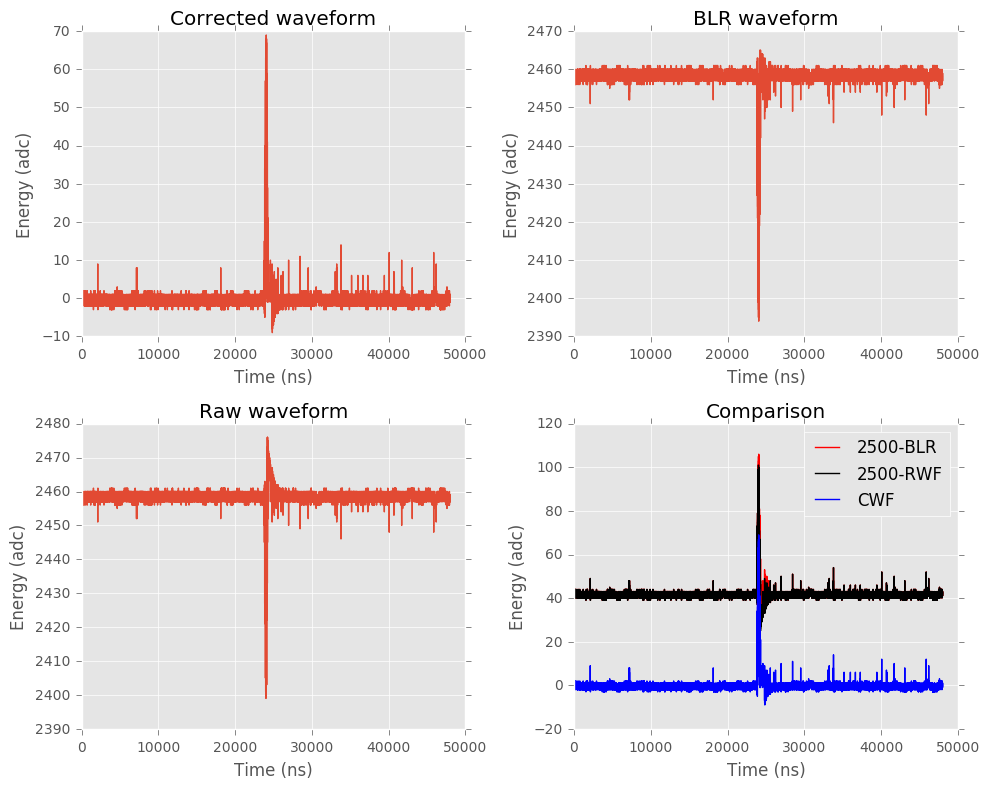

In [29]:
pmt=2
fig, axes = plt.subplots(2,2)
axes[0,0].plot(pmtcwf[0,pmt])
axes[0,1].plot(pmtblr[0,pmt])
axes[1,0].plot(pmtrwf[0,pmt])
axes[1,1].plot(2500-pmtblr[0,pmt],'r',label='2500-BLR')
axes[1,1].plot(2500-pmtrwf[0,pmt],'k',label='2500-RWF')
axes[1,1].plot(pmtcwf[0,pmt],'b',label='CWF')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (adc)');axes[0,0].set_title('Corrected waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (adc)');axes[0,1].set_title('BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (adc)');axes[1,0].set_title('Raw waveform')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (adc)');axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

### Plot of the mau, pulse_on and wait_over variables for event 0

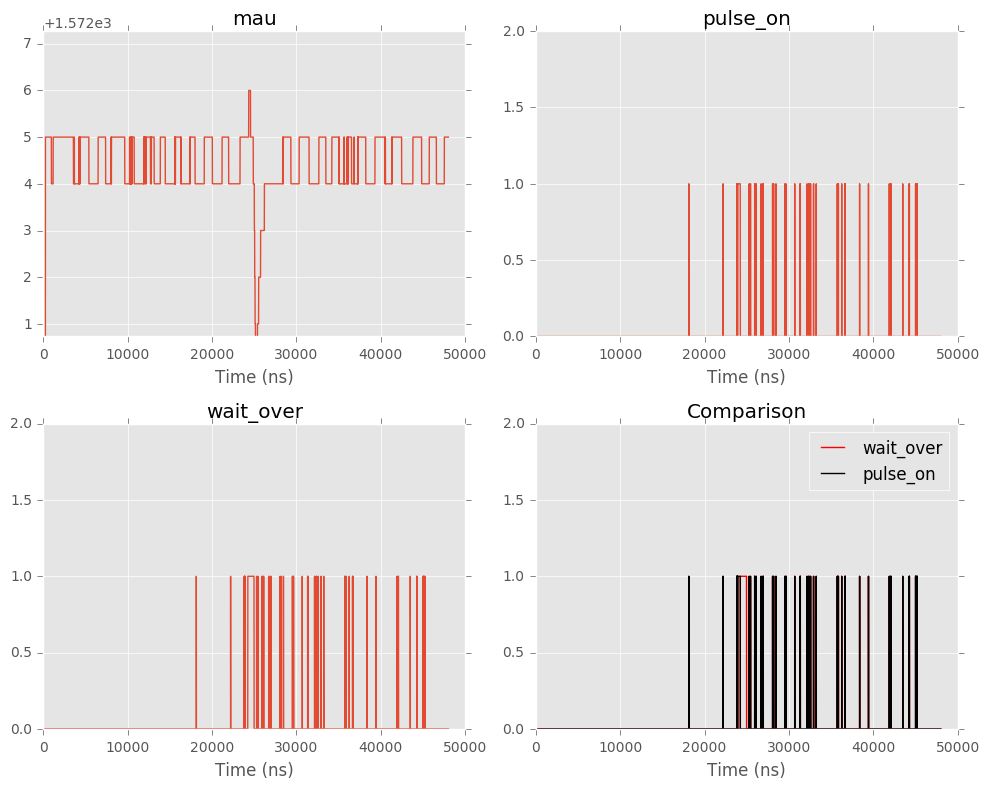

In [30]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(blrmau[0])
axes[0,1].plot(blrpulse[0])
axes[1,0].plot(blrwait[0])
axes[1,1].plot(blrwait[0],'r',label='wait_over')
axes[1,1].plot(blrpulse[0],'k',label='pulse_on')

avemau, stdmau = np.bincount(blrmau[0]).argmax(),np.std(blrmau[0])
mauwindow = avemau - 0.05*stdmau, avemau + 0.05*stdmau,
axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylim(mauwindow);axes[0,0].set_title('mau')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylim((0,2));axes[0,1].set_title('pulse_on')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylim((0,2));axes[1,0].set_title('wait_over')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylim((0,2));axes[1,1].set_title('Comparison')

axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

### Plot of the ZS CWF, and BLR for event 0 (PMT-summed):

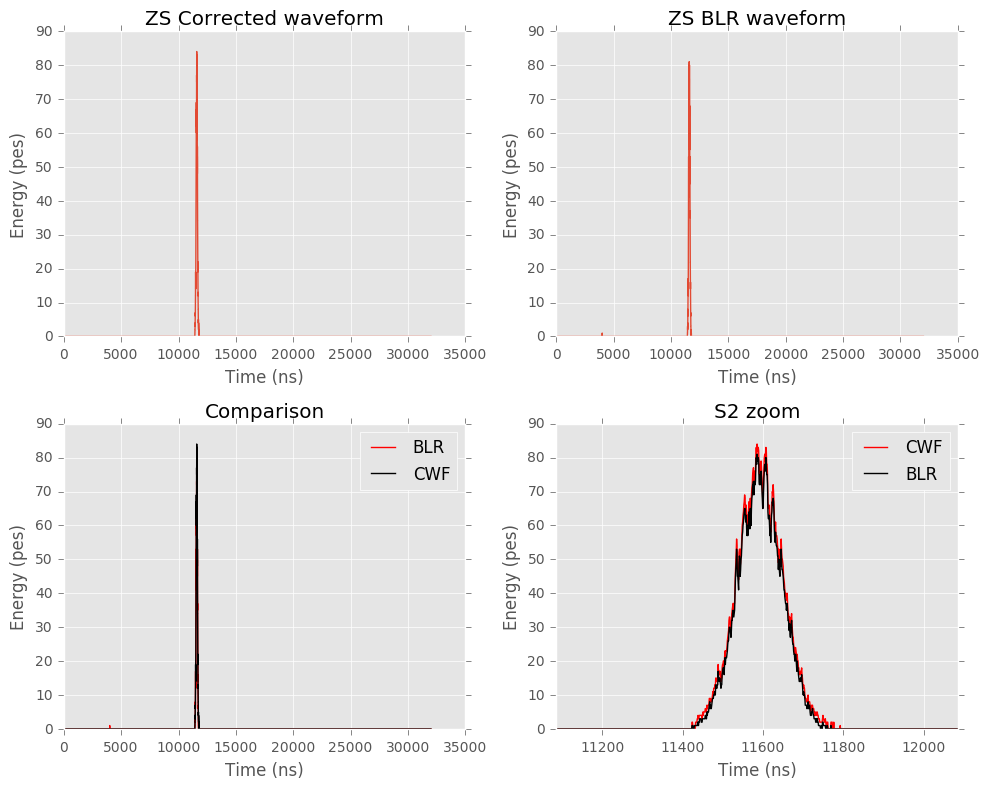

In [14]:
fig, axes = plt.subplots(2,2)
peak, window = np.argmax(pmtzswf[0,0]),500

axes[0,0].plot(pmtzswf[0,0])
axes[0,1].plot(blrzswf[0,0])
axes[1,0].plot(blrzswf[0,0],'r',label='BLR')
axes[1,0].plot(pmtzswf[0,0],'k',label='CWF')
axes[1,1].plot(pmtzswf[0,0],'r',label='CWF')
axes[1,1].plot(blrzswf[0,0],'k',label='BLR')

axes[0,0].set_xlabel('Time (ns)');axes[0,0].set_ylabel('Energy (pes)');axes[0,0].set_title('ZS Corrected waveform')
axes[0,1].set_xlabel('Time (ns)');axes[0,1].set_ylabel('Energy (pes)');axes[0,1].set_title('ZS BLR waveform')
axes[1,0].set_xlabel('Time (ns)');axes[1,0].set_ylabel('Energy (pes)');axes[1,0].set_title('Comparison')
axes[1,1].set_xlabel('Time (ns)');axes[1,1].set_ylabel('Energy (pes)');axes[1,1].set_title('S2 zoom')
axes[1,1].set_xlim((peak-window,peak+window))

axes[1,0].legend()
axes[1,1].legend()

fig.set_size_inches(10,8)
fig.tight_layout()

### Plot of the ZS SiPM WF for event 0:

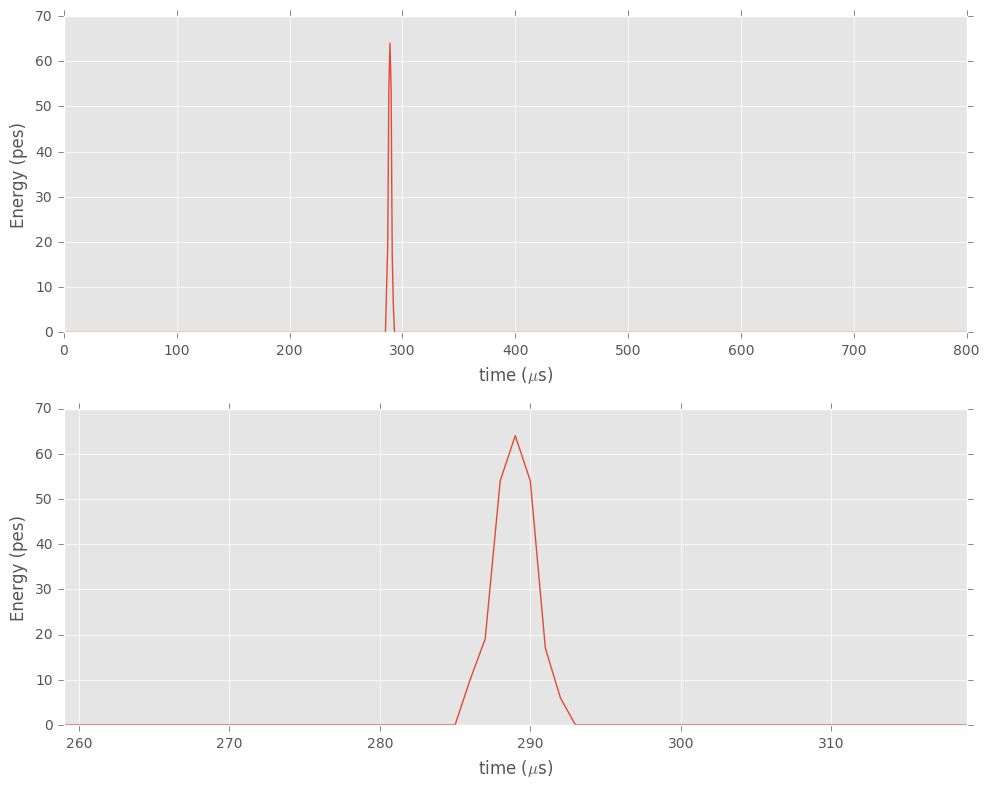

In [15]:
maxsipm = maxsipm = np.unravel_index(sipmzswf[0].argmax(),sipmzswf[0].shape)[0]
maxtime = np.argmax(sipmzswf[0,maxsipm])
wfrange = maxtime - 30,  maxtime + 30

fig, ax = plt.subplots(2)
ax[0].plot(sipmzswf[0,maxsipm])
ax[1].plot(sipmzswf[0,maxsipm]);ax[1].set_xlim(wfrange)

ax[0].set_xlabel('time ($\mu$s)');ax[0].set_ylabel('Energy (pes)')
ax[1].set_xlabel('time ($\mu$s)');ax[1].set_ylabel('Energy (pes)')

fig.set_size_inches(10,8)
fig.tight_layout()

### Statistical studies about energy: comparison between true and corrected

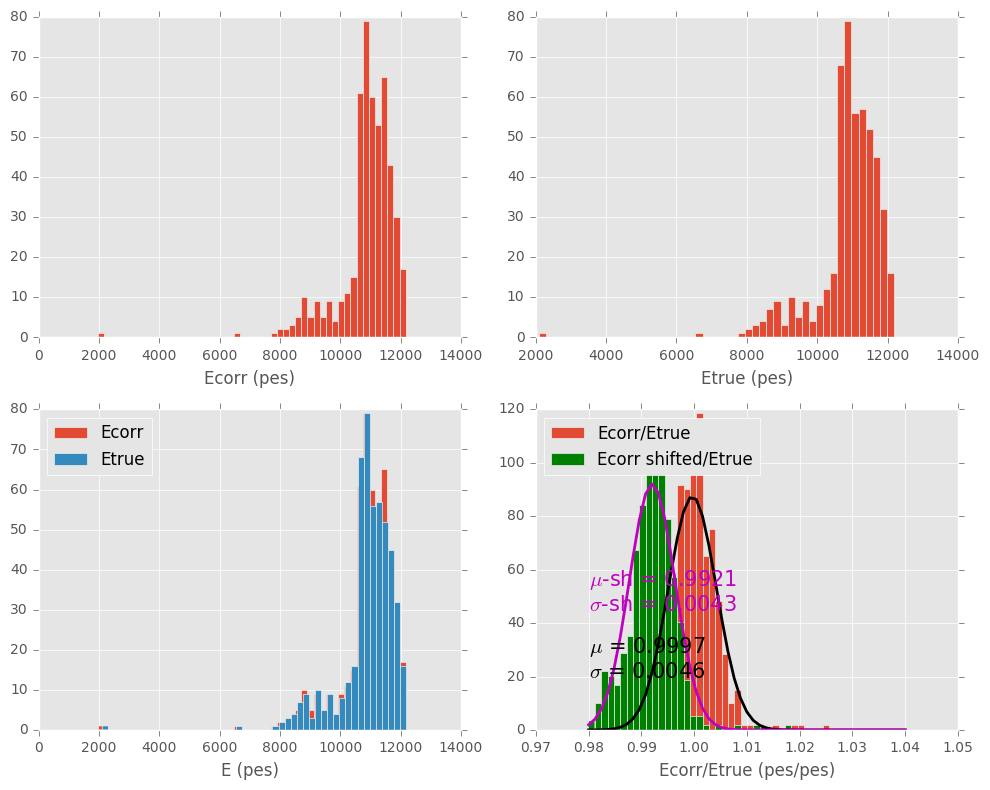

In [16]:
from scipy.stats import norm
import matplotlib.mlab as mlab

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(pmtzswf[i,0])
    Etrue[i] = tbl.read_wf_table(pmttwf,i).sum().sum(axis=1).ene_pes

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Etrue')
axes[1,0].legend(loc='upper left')
hratio = axes[1,1].hist(Eratio,nbins,range=(0.98,1.04),normed=True,label='Ecorr/Etrue')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,range=(0.98,1.04),normed=True,label='Ecorr shifted/Etrue',color='g')
axes[1,1].legend(loc='upper left')

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Etrue (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Etrue (pes/pes)')


bins = hratio[1]
mu,sigma = norm.fit(Eratio[ (Eratio>0.98) & (Eratio<1.04) ])
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr[ (EratioCorr>0.98) & (EratioCorr<1.04) ])
yC = mlab.normpdf( binsC, muC, sigmaC)

axes[1,1].text(0.98,20,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
axes[1,1].text(0.98,45,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()


### Statistical studies about energy: comparison between BLR and corrected

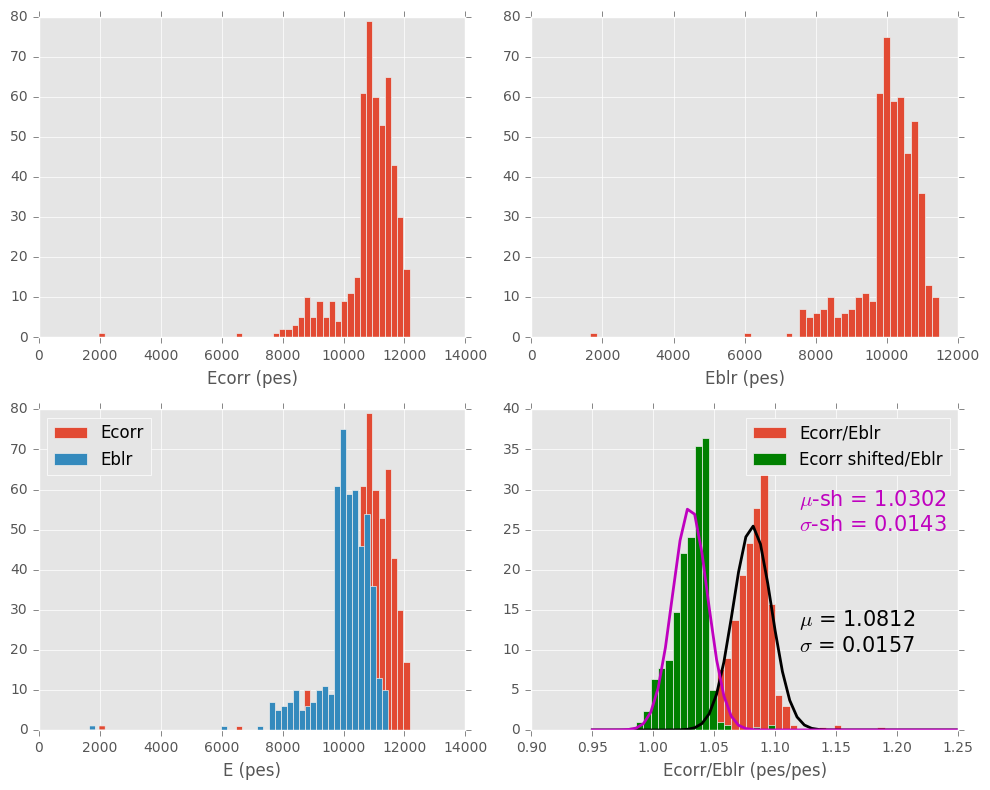

In [17]:
from scipy.stats import norm
import matplotlib.mlab as mlab

ratiorange = [0.95,1.25]

nevts = pmtrwf.shape[0]
nbins = 50
Etrue = np.empty(nevts)
Ecorr = np.empty(nevts)

for i in range(nevts):
    Ecorr[i] = np.sum(pmtzswf[i,0])
    Etrue[i] = np.sum(blrzswf[i,0])

c0,c1 = np.polyfit(Etrue,Ecorr,1)

Eratio = Ecorr/Etrue
EratioCorr = (Ecorr-c1)/Etrue

fig, axes = plt.subplots(2,2)
fig.set_size_inches(10,8)
hcorr  = axes[0,0].hist(Ecorr,nbins)
htrue  = axes[0,1].hist(Etrue,nbins)
hcorr  = axes[1,0].hist(Ecorr,nbins,label='Ecorr')
htrue  = axes[1,0].hist(Etrue,nbins,label='Eblr')
axes[1,0].legend(loc='upper left')
hratio = axes[1,1].hist(Eratio,nbins,range=ratiorange,normed=True,label='Ecorr/Eblr')
hratioCorr = axes[1,1].hist(EratioCorr,nbins,range=ratiorange,normed=True,label='Ecorr shifted/Eblr',color='g')
axes[1,1].legend()

axes[0,0].set_xlabel('Ecorr (pes)')
axes[0,1].set_xlabel('Eblr (pes)')
axes[1,0].set_xlabel('E (pes)')
axes[1,1].set_xlabel('Ecorr/Eblr (pes/pes)')

bins = hratio[1]
mu,sigma = norm.fit(Eratio[ (Eratio>ratiorange[0]) & (Eratio<ratiorange[1]) ])
y = mlab.normpdf( bins, mu, sigma)

binsC = hratioCorr[1]
muC,sigmaC = norm.fit(EratioCorr[ (EratioCorr>ratiorange[0]) & (EratioCorr<ratiorange[1]) ])
yC = mlab.normpdf( binsC, muC, sigmaC)

axes[1,1].text(1.12,10,'$\mu$ = {:.4f}\n$\sigma$ = {:.4f}'.format(mu,sigma),fontsize=15,color='k')
axes[1,1].text(1.12,25,'$\mu$-sh = {:.4f}\n$\sigma$-sh = {:.4f}'.format(muC,sigmaC),fontsize=15,color='m')

ratiof = axes[1,1].plot(bins, y, 'k-', linewidth=2)
ratiofC = axes[1,1].plot(binsC, yC, 'm-', linewidth=2)

plt.tight_layout()
